In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
!pip install -q clean-fid

In [2]:
import os, shutil, zipfile, glob, random
from PIL import Image
from cleanfid import fid

In [3]:
REAL_ZIP   = "/content/drive/MyDrive/img_align_celeba.zip"
DCGAN_ZIP  = "/content/drive/MyDrive/generated_10k_dcgan.zip"
WGAN_ZIP_100   = "/content/drive/MyDrive/generated_10k_wgangp_100.zip"
WGAN_ZIP_100_last_try = "/content/drive/MyDrive/generated_10k_wgangp_100_last_try.zip"

EXTRACT_REAL  = "/content/real_dataset"
REAL_SUBFOLDER = "/content/real_dataset/img_align_celeba"
EXTRACT_DCGAN = "/content/dcgan_10k"
EXTRACT_WGAN_100  = "/content/wgangp_10k_100"
EXTRACT_WGAN_100_last_try  = "/content/wgangp_10k_100_last_try"

N_REAL_SAMPLES   = 10_000
SUBSET_REAL_DIR  = "/content/real_10k"

In [5]:
def safe_extract(zip_path, extract_to):
    if os.path.exists(extract_to):
        shutil.rmtree(extract_to)
    os.makedirs(extract_to, exist_ok=True)

    print(f"Extracting {zip_path} to {extract_to}")
    with zipfile.ZipFile(zip_path, 'r') as z:
        z.extractall(extract_to)
    print("Done.\n")

safe_extract(REAL_ZIP, EXTRACT_REAL)
safe_extract(DCGAN_ZIP, EXTRACT_DCGAN)
safe_extract(WGAN_ZIP_100, EXTRACT_WGAN_100)
safe_extract(WGAN_ZIP_100, EXTRACT_WGAN_100_last_try)

Extracting /content/drive/MyDrive/img_align_celeba.zip to /content/real_dataset
Done.

Extracting /content/drive/MyDrive/generated_10k_dcgan.zip to /content/dcgan_10k
Done.

Extracting /content/drive/MyDrive/generated_10k_wgangp_100.zip to /content/wgangp_10k_100
Done.

Extracting /content/drive/MyDrive/generated_10k_wgangp_100.zip to /content/wgangp_10k_100_last_try
Done.



In [6]:
random.seed(42)

IMAGE_SIZE = 128

if os.path.exists(SUBSET_REAL_DIR):
    shutil.rmtree(SUBSET_REAL_DIR)
os.makedirs(SUBSET_REAL_DIR, exist_ok=True)

all_images = []
extensions = ("*.png", "*.jpg", "*.jpeg", "*.bmp", "*.webp")

for ext in extensions:
    all_images.extend(glob.glob(os.path.join(REAL_SUBFOLDER, ext)))

print("Total real images found:", len(all_images))

if len(all_images) < N_REAL_SAMPLES:
    raise ValueError(f"Need at least {N_REAL_SAMPLES} real images, found {len(all_images)}.")

subset_paths = random.sample(all_images, N_REAL_SAMPLES)

for i, src in enumerate(subset_paths):
    img = Image.open(src).convert("RGB")
    img = img.resize((IMAGE_SIZE, IMAGE_SIZE), Image.LANCZOS)

    dst = os.path.join(SUBSET_REAL_DIR, f"{i:05d}.jpg")
    img.save(dst, quality=95)

print(f"Created subset of {N_REAL_SAMPLES} resized images at: {SUBSET_REAL_DIR}")


Total real images found: 202599
Created subset of 10000 resized images at: /content/real_10k


In [7]:
from PIL import Image
import os

p = os.path.join(EXTRACT_WGAN_100, os.listdir(EXTRACT_WGAN_100)[0])
img = Image.open(p)
print("WGAN image size:", img.size)

p = os.path.join(SUBSET_REAL_DIR, os.listdir(SUBSET_REAL_DIR)[0])
img = Image.open(p)
print("Real subset size:", img.size)


WGAN image size: (128, 128)
Real subset size: (128, 128)


In [ ]:
print("DCGAN vs Real (10k vs 10k)")
fid_dcgan = fid.compute_fid(SUBSET_REAL_DIR, EXTRACT_DCGAN)
kid_dcgan = fid.compute_kid(SUBSET_REAL_DIR, EXTRACT_DCGAN)

print(f"FID (DCGAN): {fid_dcgan:.4f}")
print(f"KID (DCGAN): {kid_dcgan:.6f}")

DCGAN vs Real (10k vs 10k)


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 12 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


compute FID between two folders
Found 10000 images in the folder /content/real_10k


FID real_10k : 100%|██████████| 313/313 [01:02<00:00,  4.98it/s]


Found 10000 images in the folder /content/dcgan_10k


FID dcgan_10k : 100%|██████████| 313/313 [01:06<00:00,  4.72it/s]


compute KID between two folders
Found 10000 images in the folder /content/real_10k


KID real_10k : 100%|██████████| 313/313 [01:02<00:00,  5.02it/s]


Found 10000 images in the folder /content/dcgan_10k


KID dcgan_10k : 100%|██████████| 313/313 [01:04<00:00,  4.85it/s]


FID (DCGAN): 76.9316
KID (DCGAN): 0.063693


In [ ]:
print("WGAN-GP_100 vs Real (10k vs 10k)")
fid_wgan_100 = fid.compute_fid(SUBSET_REAL_DIR, EXTRACT_WGAN_100)
kid_wgan_100 = fid.compute_kid(SUBSET_REAL_DIR, EXTRACT_WGAN_100)

print(f"FID (WGAN-GP_100): {fid_wgan_100:.4f}")
print(f"KID (WGAN-GP_100): {kid_wgan_100:.6f}")

WGAN-GP_100 vs Real (10k vs 10k)
compute FID between two folders
Found 10000 images in the folder /content/real_10k


FID real_10k : 100%|██████████| 313/313 [01:02<00:00,  5.03it/s]


Found 10000 images in the folder /content/wgangp_10k_100


FID wgangp_10k_100 : 100%|██████████| 313/313 [01:05<00:00,  4.76it/s]


compute KID between two folders
Found 10000 images in the folder /content/real_10k


KID real_10k : 100%|██████████| 313/313 [01:02<00:00,  5.02it/s]


Found 10000 images in the folder /content/wgangp_10k_100


KID wgangp_10k_100 : 100%|██████████| 313/313 [01:03<00:00,  4.89it/s]


FID (WGAN-GP_100): 90.3651
KID (WGAN-GP_100): 0.084355


In [ ]:
# This was last try where number of critiques was 7
print("WGAN-GP_100 vs Real (10k vs 10k)")
fid_wgan_100_last_try = fid.compute_fid(SUBSET_REAL_DIR, EXTRACT_WGAN_100_last_try)
kid_wgan_100_last_try = fid.compute_kid(SUBSET_REAL_DIR, EXTRACT_WGAN_100_last_try)

print(f"FID (WGAN-GP_100): {fid_wgan_100_last_try:.4f}")
print(f"KID (WGAN-GP_100): {kid_wgan_100_last_try:.6f}")

WGAN-GP_100 vs Real (10k vs 10k)


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 12 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


compute FID between two folders
Found 10000 images in the folder /content/real_10k


FID real_10k : 100%|██████████| 313/313 [01:02<00:00,  4.99it/s]


Found 10000 images in the folder /content/wgangp_10k_100_last_try


FID wgangp_10k_100_last_try : 100%|██████████| 313/313 [01:03<00:00,  4.91it/s]


compute KID between two folders
Found 10000 images in the folder /content/real_10k


KID real_10k : 100%|██████████| 313/313 [01:01<00:00,  5.09it/s]


Found 10000 images in the folder /content/wgangp_10k_100_last_try


KID wgangp_10k_100_last_try : 100%|██████████| 313/313 [01:04<00:00,  4.88it/s]


FID (WGAN-GP_100): 90.3651
KID (WGAN-GP_100): 0.084738


In [8]:
print("DCGAN vs WGAN-GP_100 (10k vs 10k)")
fid_dc_wgan = fid.compute_fid(EXTRACT_WGAN_100, EXTRACT_DCGAN)
kid_dc_wgan = fid.compute_kid(EXTRACT_WGAN_100, EXTRACT_DCGAN)

print(f"FID (DCGAN vs WGAN-GP): {fid_dc_wgan:.4f}")
print(f"KID (DCGAN vs WGAN-GP): {kid_dc_wgan:.6f}")

DCGAN vs WGAN-GP_100 (10k vs 10k)


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 12 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


compute FID between two folders
Found 10000 images in the folder /content/wgangp_10k_100


FID wgangp_10k_100 : 100%|██████████| 313/313 [01:07<00:00,  4.61it/s]


Found 10000 images in the folder /content/dcgan_10k


FID dcgan_10k : 100%|██████████| 313/313 [01:04<00:00,  4.87it/s]


compute KID between two folders
Found 10000 images in the folder /content/wgangp_10k_100


KID wgangp_10k_100 : 100%|██████████| 313/313 [01:05<00:00,  4.76it/s]


Found 10000 images in the folder /content/dcgan_10k


KID dcgan_10k : 100%|██████████| 313/313 [01:05<00:00,  4.77it/s]


FID (DCGAN vs WGAN-GP): 39.6240
KID (DCGAN vs WGAN-GP): 0.039140


In [13]:
import pandas as pd

results = pd.DataFrame(
    {
        "comparison": [
            "DCGAN vs Real",
            "WGAN-GP_100 vs Real",
            "DCGAN vs WGAN-GP_100",
        ],
        "FID": [
            fid_dcgan,
            fid_wgan_100,
            fid_dc_wgan,
        ],
        "KID": [
            kid_dcgan,
            kid_wgan_100,
            kid_dc_wgan,
        ],
    }
)

results

,comparison,FID,KID
0,DCGAN vs Real,76.931600,0.063693
1,WGAN-GP_100 vs Real,90.365100,0.084355
2,DCGAN vs WGAN-GP_100,39.624049,0.039140


In [14]:
from PIL import Image
import matplotlib.pyplot as plt

def preview_random_images(folder_path, n=3):
    exts = (".png", ".jpg", ".jpeg", ".bmp", ".webp")
    image_paths = [os.path.join(folder_path, f)
                   for f in os.listdir(folder_path)
                   if f.lower().endswith(exts)]

    chosen = random.sample(image_paths, n)

    plt.figure(figsize=(4*n, 4))
    for i, img_path in enumerate(chosen):
        img = Image.open(img_path)
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(os.path.basename(img_path), fontsize=10)

    plt.show()

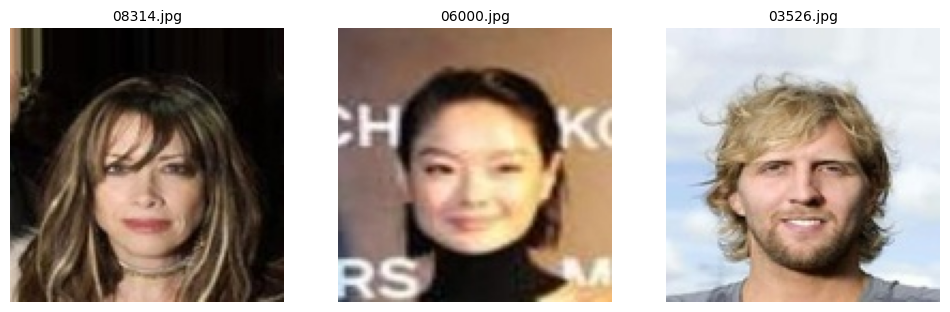

In [17]:
preview_random_images(SUBSET_REAL_DIR)

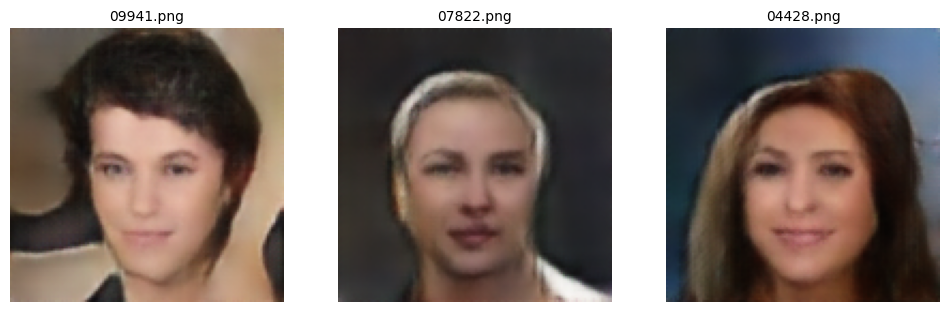

In [ ]:
preview_random_images(EXTRACT_DCGAN)

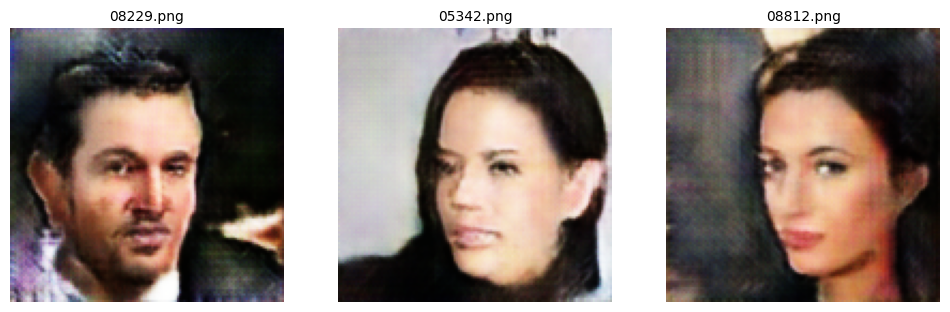

In [25]:
preview_random_images(EXTRACT_WGAN_100)

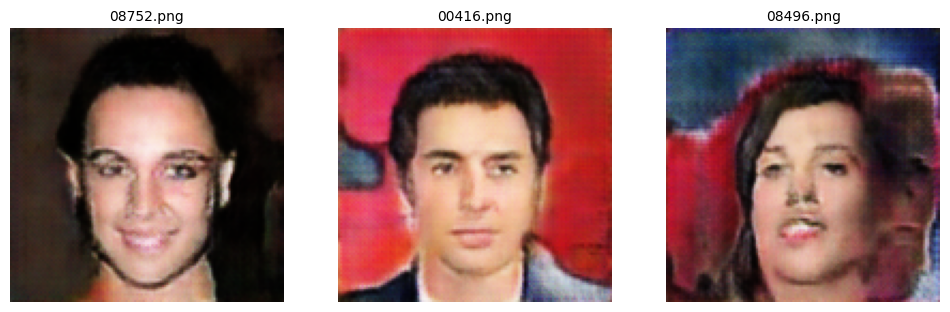

In [30]:
preview_random_images(EXTRACT_WGAN_100_last_try)